In [4]:
#Titanic Kaggle

In [5]:
import pandas as pd
datos = pd.read_csv("titanic.csv")

In [6]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

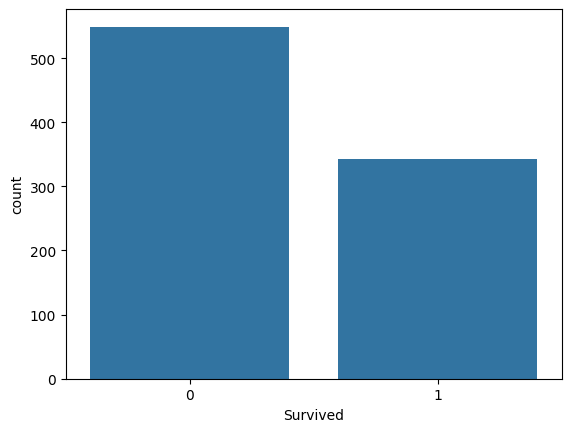

In [8]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

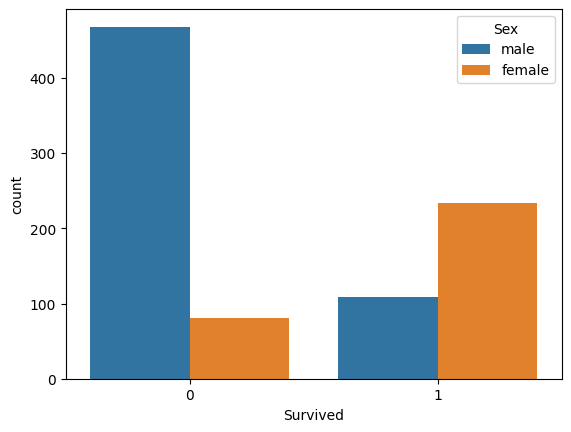

In [9]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [10]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

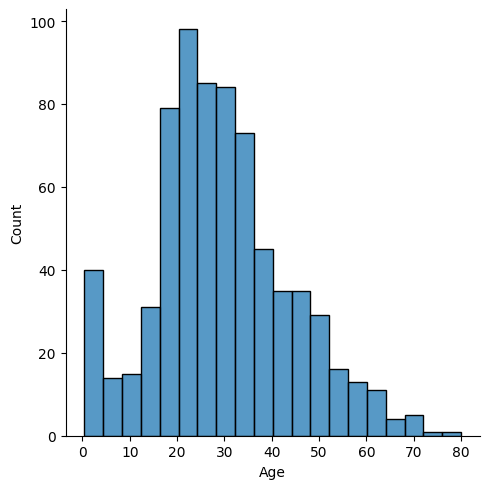

In [11]:
sb.displot(x="Age", data=datos)

In [12]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
datos["Age"].mean()

np.float64(29.69911764705882)

In [14]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [15]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [16]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [17]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
datos = datos.drop(["Cabin"], axis=1)

In [19]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
datos = datos.dropna()

In [21]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [23]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [24]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

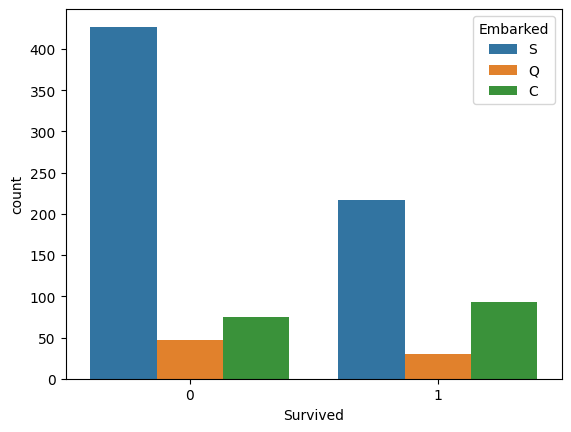

In [25]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [26]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [27]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

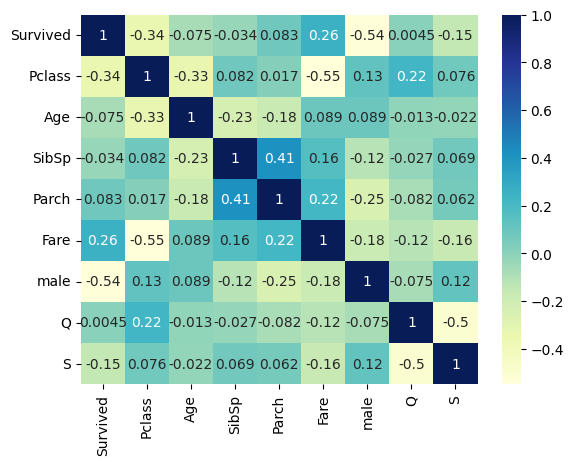

In [28]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

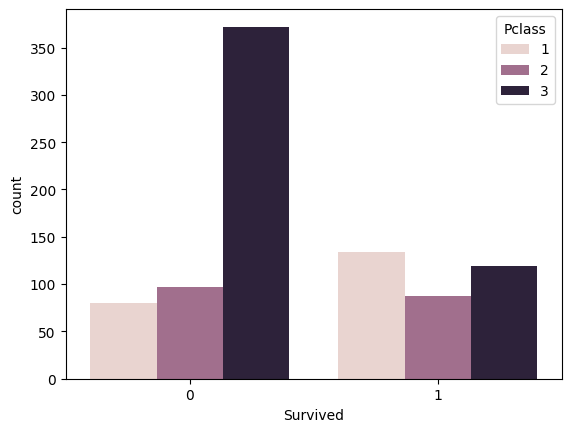

In [29]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [30]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [31]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [32]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8089887640449438

In [34]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.8258426966292135
Resultado para 2: 0.797752808988764
Resultado para 3: 0.8146067415730337
Resultado para 4: 0.8314606741573034
Resultado para 5: 0.8314606741573034
Resultado para 6: 0.8314606741573034
Resultado para 7: 0.8539325842696629
Resultado para 8: 0.8314606741573034
Resultado para 9: 0.8258426966292135
Resultado para 10: 0.8089887640449438
Resultado para 11: 0.8314606741573034
Resultado para 12: 0.797752808988764
Resultado para 13: 0.7752808988764045
Resultado para 14: 0.7808988764044944


<Axes: >

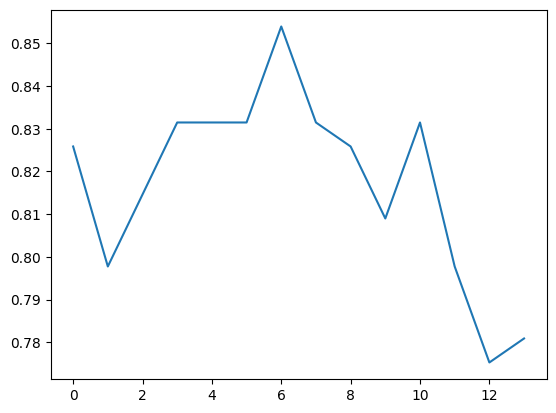

In [35]:
sb.lineplot(data=resultados)

In [36]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       112
           1       0.82      0.70      0.75        66

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178



In [38]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,102,10
Real: Si,20,46


In [39]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.45256024096385544, 0.9444444444444444, 'male <= 0.5\n0.474\n711\n[437, 274]\nMurió'),
 Text(0.16340361445783133, 0.8333333333333334, 'Pclass <= 2.5\n0.398\n255\n[70, 185]\nVivió'),
 Text(0.3079819277108434, 0.8888888888888888, 'True  '),
 Text(0.060240963855421686, 0.7222222222222222, 'Age <= 2.5\n0.099\n134\n[7, 127]\nVivió'),
 Text(0.03614457831325301, 0.6111111111111112, 'Parch <= 1.5\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.024096385542168676, 0.5, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.04819277108433735, 0.5, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.08433734939759036, 0.6111111111111112, 'Fare <= 28.856\n0.087\n132\n[6, 126]\nVivió'),
 Text(0.07228915662650602, 0.5, 'Fare <= 28.231\n0.194\n55\n[6, 49]\nVivió'),
 Text(0.060240963855421686, 0.3888888888888889, 'Age <= 56.0\n0.168\n54\n[5, 49]\nVivió'),
 Text(0.03614457831325301, 0.2777777777777778, 'Parch <= 0.5\n0.142\n52\n[4, 48]\nVivió'),
 Text(0.024096385542168676, 0.16666666666666666, 'Fare <= 12.675\n0.193\n37\n[4, 33]\nVivió'),
 Text(0.

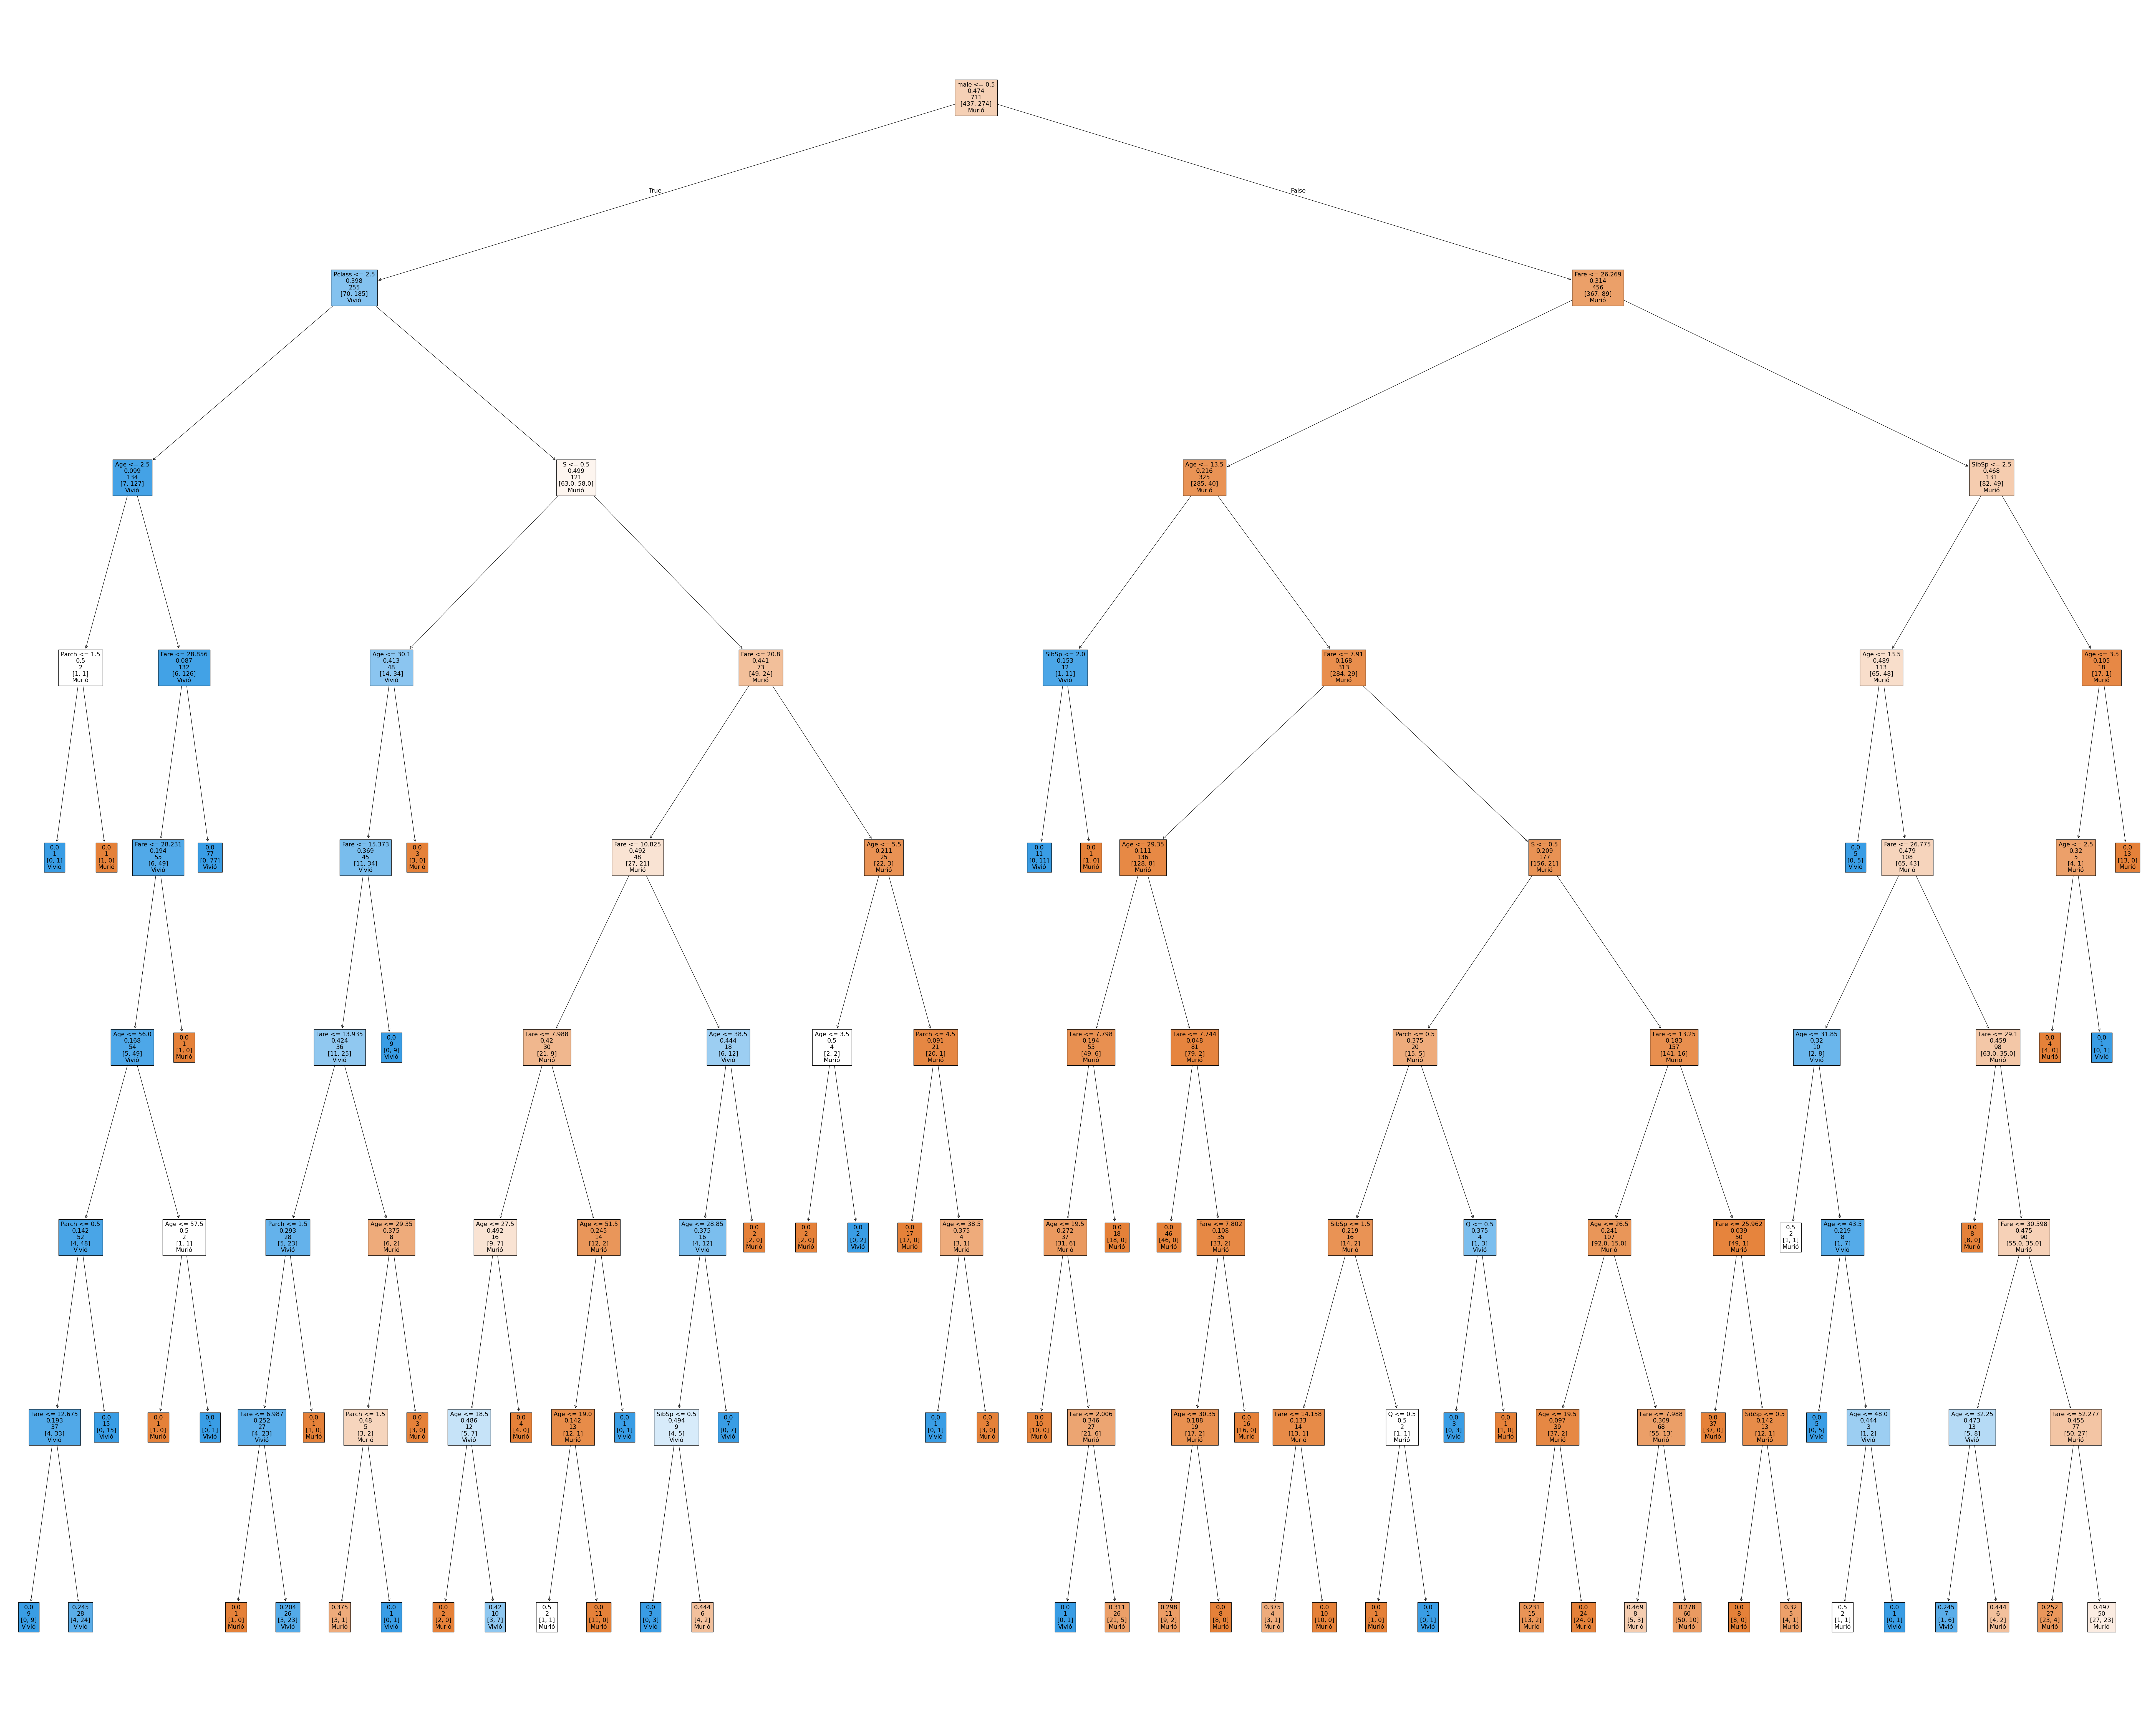

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8314606741573034

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       112
           1       0.82      0.70      0.75        66

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178



In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[102,  10],
       [ 20,  46]])

In [44]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,102,10
Real: Si,20,46


In [45]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [46]:
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

Sobreviviste


c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
